In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("/content/dataset.csv",index_col=0)
df.head(10)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN
6,Ford Focus,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
7,Vauxhall Corsa,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN
8,Volvo 740,750,225318,1989,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN


In [3]:
df.shape

(3685, 13)

In [4]:
df.columns

Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3685 entries, 0 to 4727
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3685 non-null   object 
 1   Price              3685 non-null   int64  
 2   Mileage(miles)     3685 non-null   int64  
 3   Registration_Year  3685 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3685 non-null   object 
 6   Body type          3685 non-null   object 
 7   Engine             3640 non-null   object 
 8   Gearbox            3685 non-null   object 
 9   Doors              3660 non-null   float64
 10  Seats              3650 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 403.0+ KB


In [6]:
df.isnull().sum()

,0
title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,1409
Fuel type,0
Body type,0
Engine,45
Gearbox,0
Doors,25


In [7]:
# Get summary statistics for numerical features
numerical_summary = df.describe()
print("Numerical Summary:\n", numerical_summary)

# Get summary statistics for categorical features
categorical_summary = df.describe(include=['object'])
print("Categorical Summary:\n", categorical_summary)


Numerical Summary:
               Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3685.000000    3.685000e+03        3685.000000      2276.000000   
mean    5787.145726    8.132816e+04        2011.835007         2.807557   
std     4480.810572    3.942083e+04           5.092566         1.546028   
min      400.000000    1.000000e+00        1953.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7995.000000    1.030000e+05        2015.000000         4.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

             Doors        Seats  
count  3660.000000  3650.000000  
mean      4.321038     4.900274  
std       0.986902     0.577200  
min       2.000000     2.000000  
25%       3.000000     5.000000  
50%       5.000000     5.000000  
75%       5.000000     5.000000  
max       5.000000     7.000000 

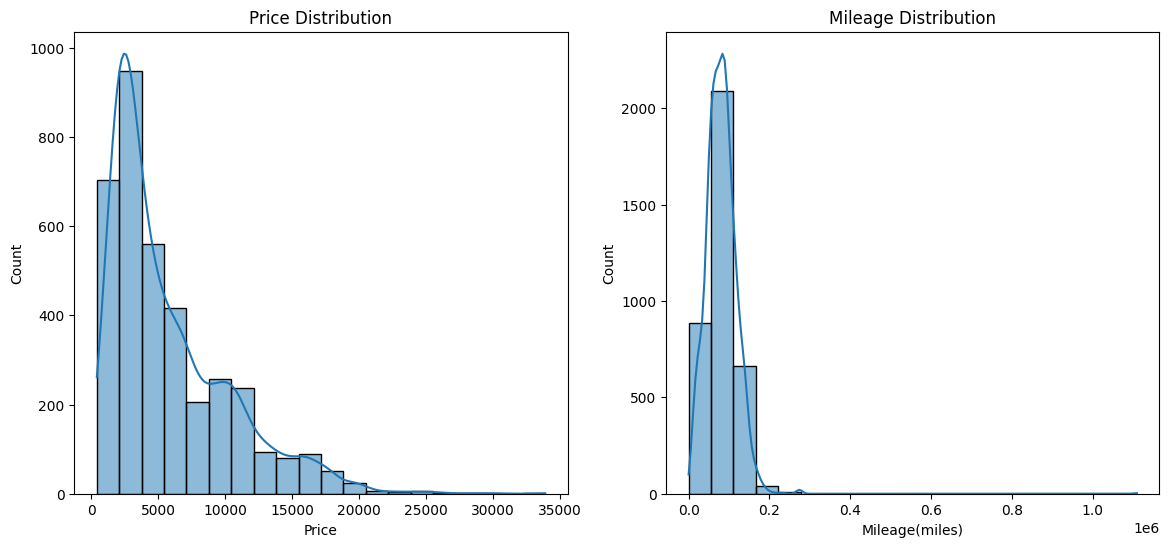

In [8]:
plt.figure(figsize=(14, 6))

# Price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')

# Mileage distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Mileage(miles)'], bins=20, kde=True)
plt.title('Mileage Distribution')

plt.show()


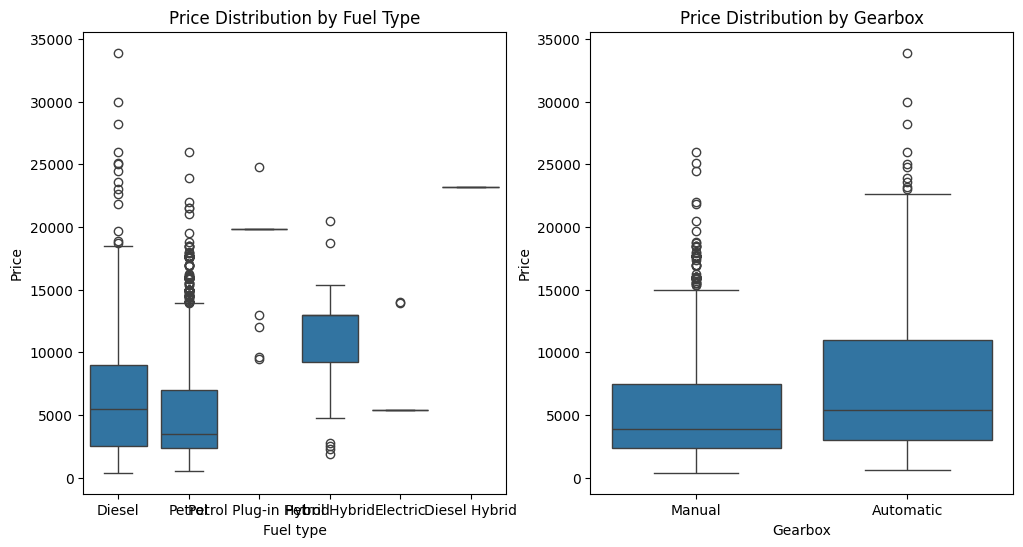

In [9]:
plt.figure(figsize=(12, 6))

# Price vs Fuel type
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')

# Price vs Gearbox
plt.subplot(1, 2, 2)
sns.boxplot(x='Gearbox', y='Price', data=df)
plt.title('Price Distribution by Gearbox')

plt.show()


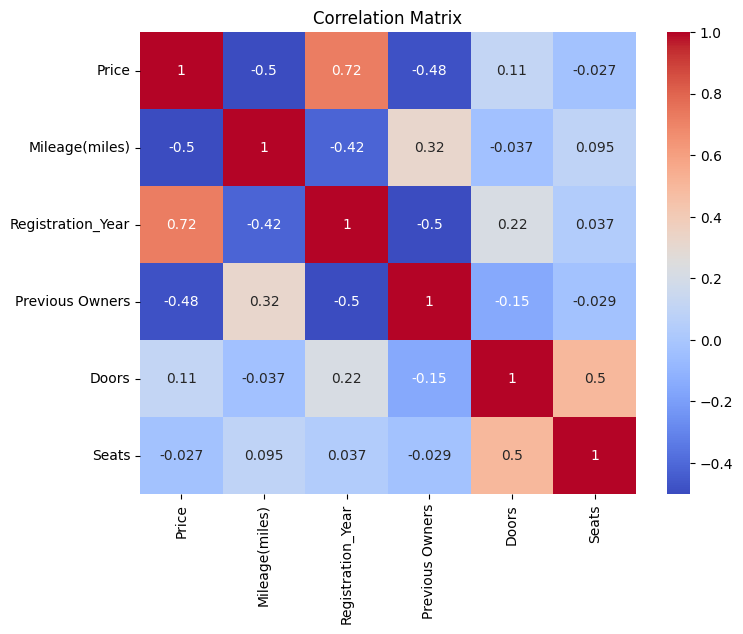

In [10]:
# Only include numerical columns for correlation
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='Price', ylabel='Count'>

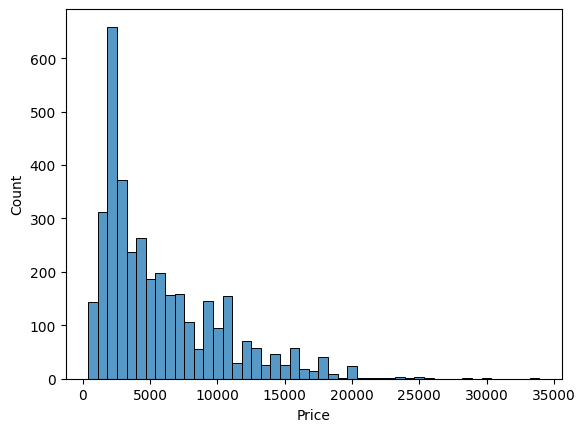

In [11]:
sns.histplot(df['Price'])

In [12]:
df = df[df["Mileage(miles)"]<1000000]

<Axes: xlabel='Mileage(miles)', ylabel='Count'>

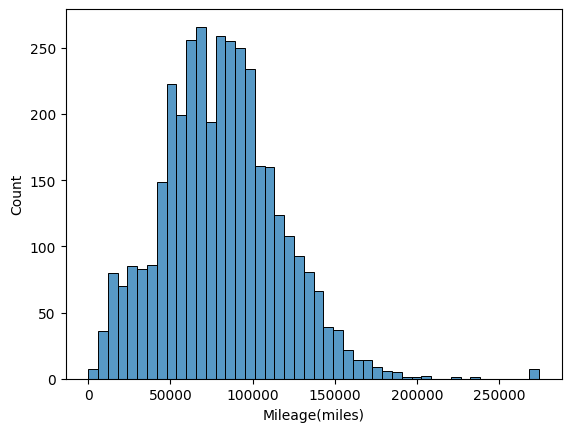

In [13]:
sns.histplot(df["Mileage(miles)"])

<Axes: xlabel='Mileage(miles)', ylabel='Price'>

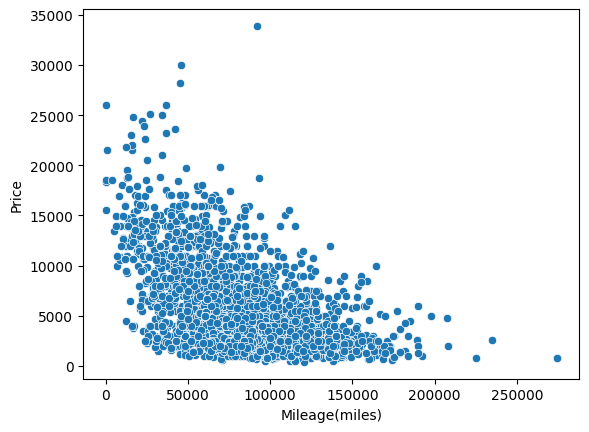

In [14]:
sns.scatterplot(x=df["Mileage(miles)"],y=df['Price'])

<Axes: xlabel='Registration_Year', ylabel='Count'>

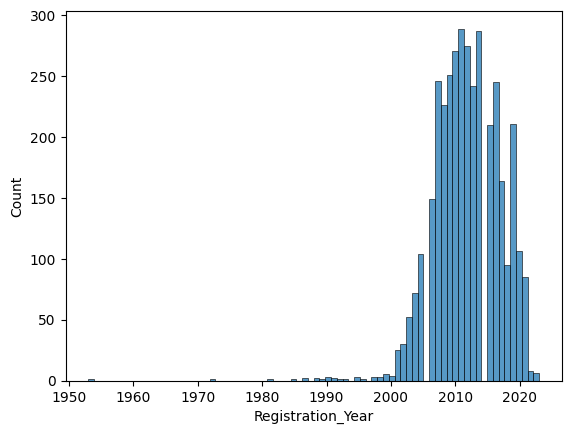

In [15]:
sns.histplot(df["Registration_Year"])

In [16]:
df["Registration_Year"].value_counts()

,count
Registration_Year,
2011,289
2014,287
2012,275
2010,271
2009,251
2007,246
2016,245
2013,242
2008,226


<Axes: xlabel='Registration_Year', ylabel='Price'>

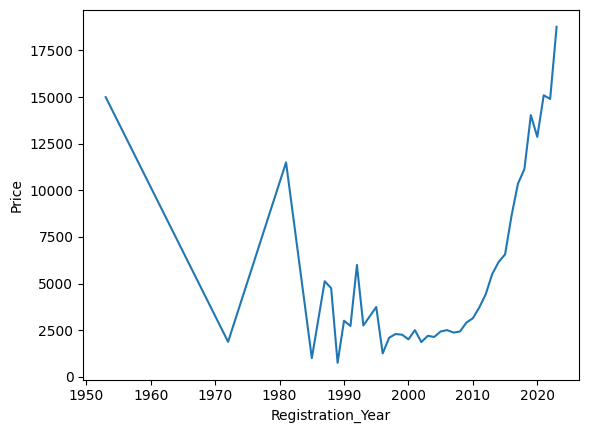

In [17]:
tmp_df = df.groupby("Registration_Year").agg({"Price":"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df["Price"])

<Axes: xlabel='Previous Owners', ylabel='Count'>

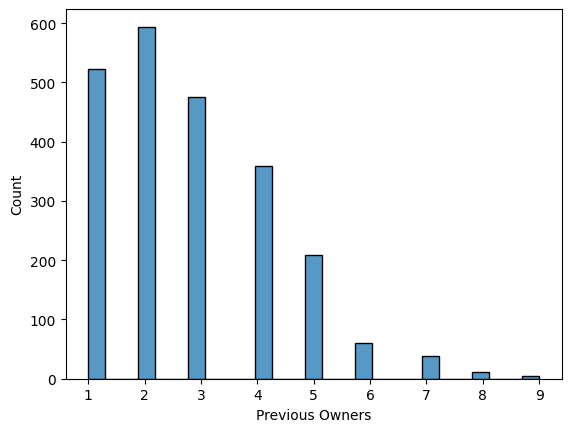

In [18]:
sns.histplot(df["Previous Owners"])

<Axes: xlabel='Previous Owners', ylabel='Price'>

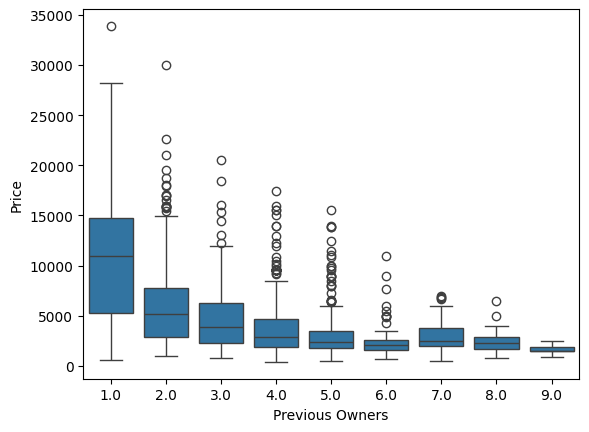

In [19]:
sns.boxplot(x=df["Previous Owners"],y=df["Price"])

<Axes: xlabel='Previous Owners', ylabel='Price'>

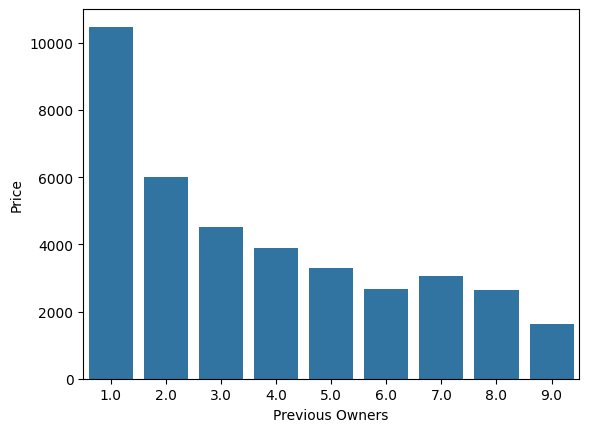

In [20]:
tmp_df = df.groupby("Previous Owners").agg({"Price":"mean"})
sns.barplot(x=tmp_df.index,y=tmp_df['Price'])

<Axes: xlabel='Previous Owners', ylabel='Registration_Year'>

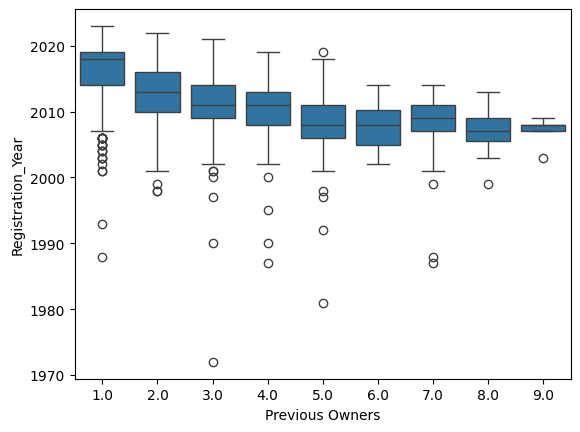

In [21]:
sns.boxplot(x=df["Previous Owners"],y=df["Registration_Year"])

Fuel type
Petrol                   2360
Diesel                   1218
Petrol Hybrid              47
Electric                   31
Petrol Plug-in Hybrid      27
Diesel Hybrid               1
Name: count, dtype: int64


<Axes: xlabel='Fuel type', ylabel='Count'>

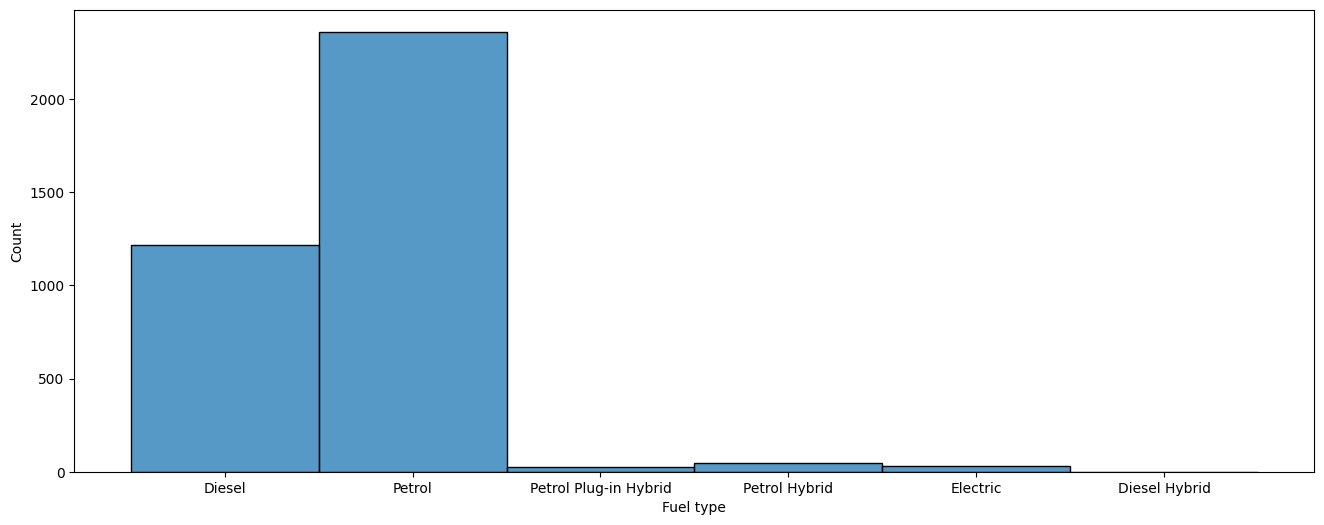

In [22]:
print(df["Fuel type"].value_counts())
plt.figure(figsize=(16,6))
sns.histplot(df["Fuel type"])

<Axes: xlabel='Fuel type', ylabel='Price'>

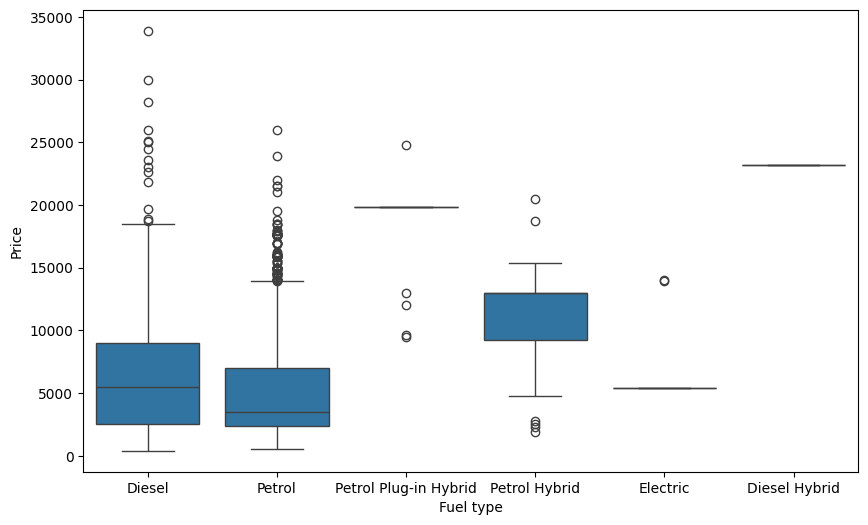

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Fuel type"],y=df['Price'])

<Axes: xlabel='Fuel type', ylabel='Registration_Year'>

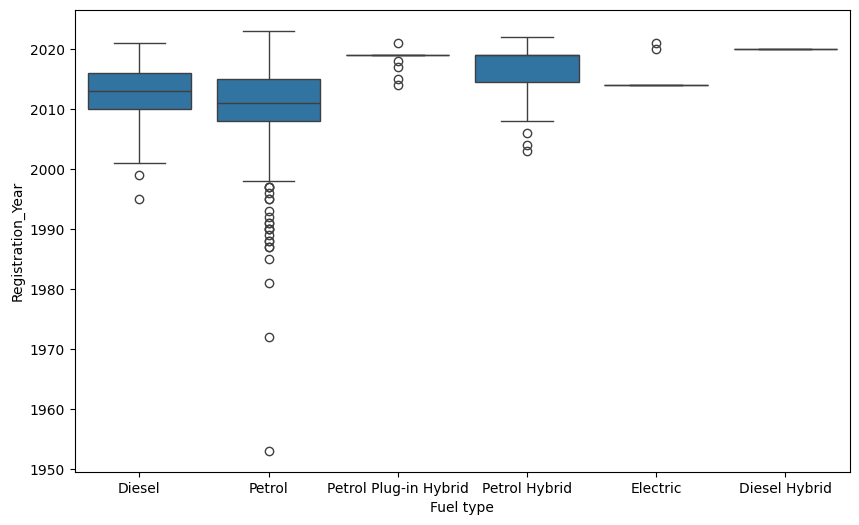

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Fuel type"],y=df["Registration_Year"])

Body type
Hatchback      2278
SUV             460
Saloon          368
Estate          171
MPV             153
Coupe           139
Convertible     109
Pickup            3
Combi Van         2
Minibus           1
Name: count, dtype: int64


<Axes: xlabel='Body type', ylabel='Count'>

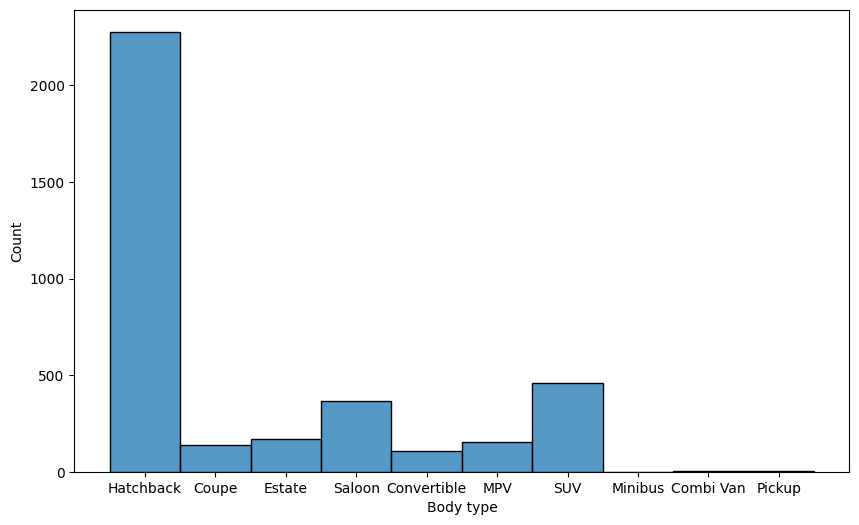

In [25]:
print(df["Body type"].value_counts())
plt.figure(figsize=(10,6))
sns.histplot(df["Body type"])

<Axes: xlabel='Body type', ylabel='Price'>

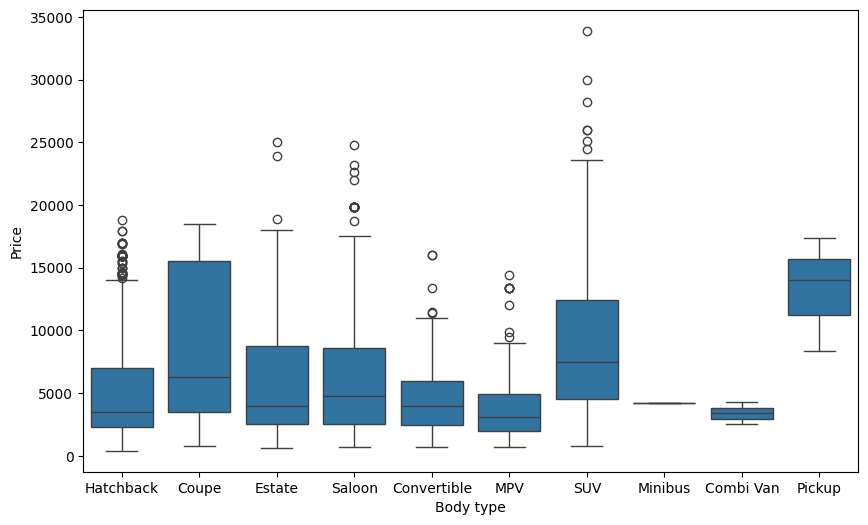

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Body type"],y=df['Price'])

In [27]:
pd.crosstab(df["Body type"],df["Fuel type"],margins=True,normalize=True)

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid,All
Body type,,,,,,,
Combi Van,0.000543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000543
Convertible,0.004886,0.000000,0.000000,0.024701,0.000000,0.000000,0.029587
Coupe,0.016287,0.000000,0.000000,0.020901,0.000543,0.000000,0.037731
Estate,0.035559,0.000000,0.000000,0.010858,0.000000,0.000000,0.046417
Hatchback,0.128122,0.000000,0.008143,0.471498,0.010043,0.000543,0.618350
MPV,0.024973,0.000000,0.000000,0.016015,0.000543,0.000000,0.041531
Minibus,0.000000,0.000000,0.000000,0.000271,0.000000,0.000000,0.000271
Pickup,0.000814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000814
SUV,0.065689,0.000000,0.000271,0.058360,0.000543,0.000000,0.124864


In [28]:
df["Engine"] = df["Engine"].str[:3].astype("float")

<Axes: xlabel='Engine', ylabel='Count'>

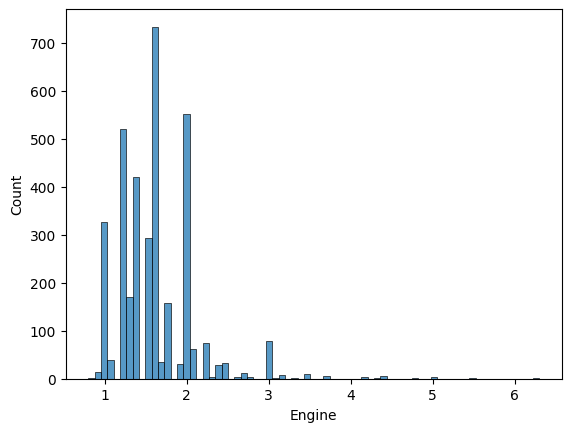

In [29]:
sns.histplot(df["Engine"])

<Axes: xlabel='Engine', ylabel='Price'>

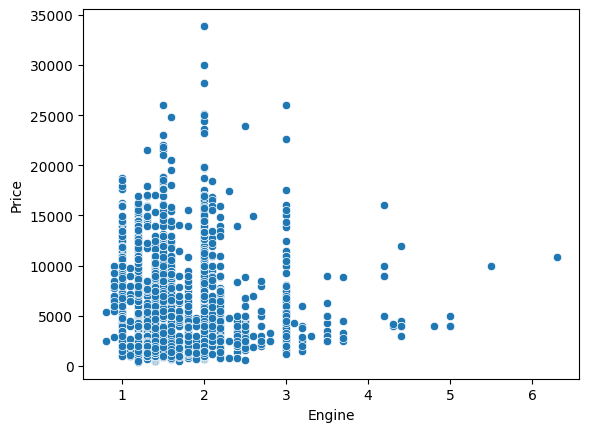

In [30]:
sns.scatterplot(x=df["Engine"],y=df["Price"])

<Axes: xlabel='Fuel type', ylabel='Engine'>

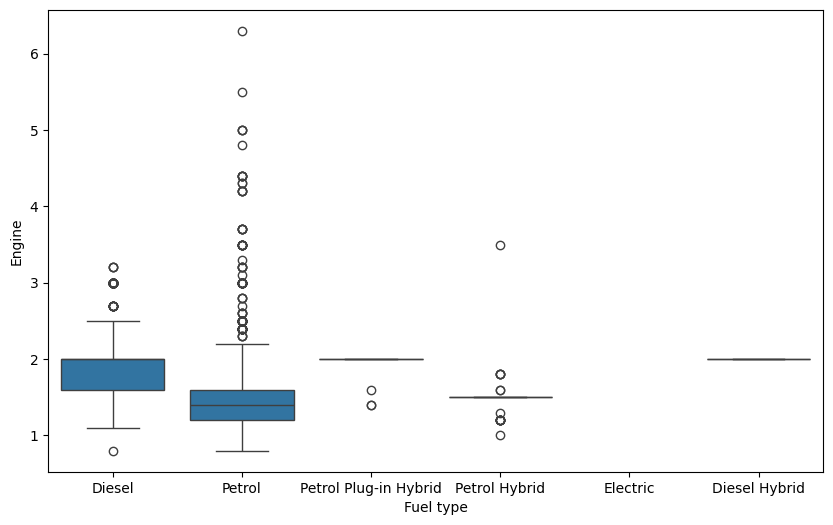

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Fuel type"],y=df["Engine"])

<Axes: xlabel='Body type', ylabel='Engine'>

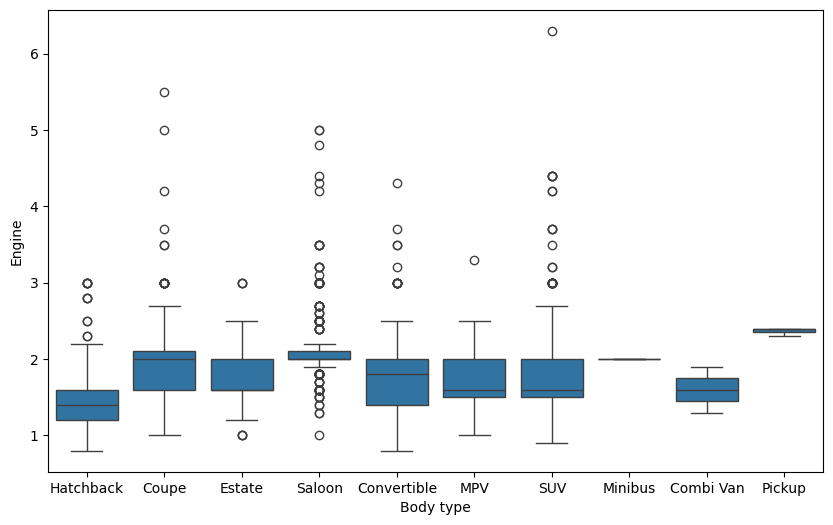

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Body type"],y=df["Engine"])

In [33]:
df["Gearbox"].value_counts()

,count
Gearbox,
Manual,2868
Automatic,816


<Axes: xlabel='Gearbox', ylabel='Price'>

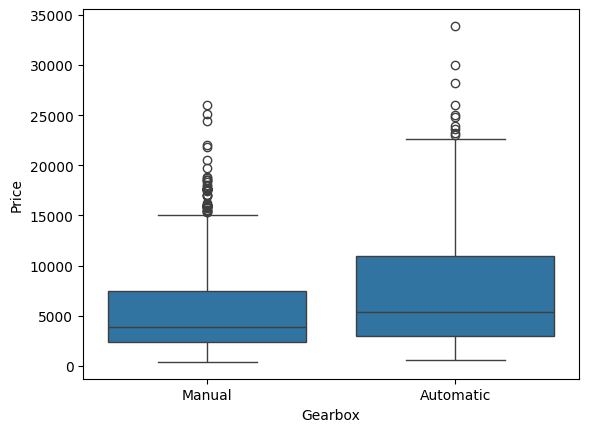

In [34]:
sns.boxplot(x=df["Gearbox"],y=df["Price"])

<Axes: xlabel='Gearbox', ylabel='Registration_Year'>

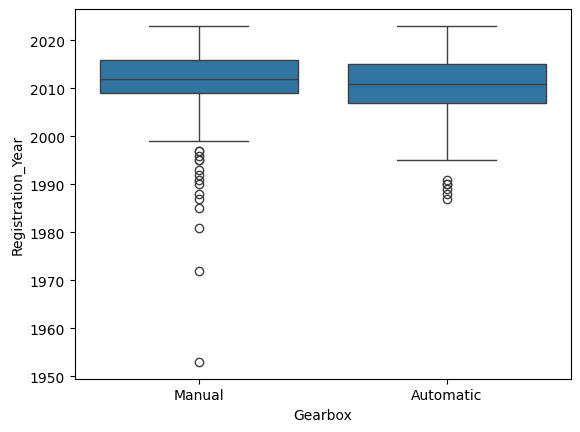

In [35]:
sns.boxplot(x=df["Gearbox"],y=df["Registration_Year"])

In [36]:
pd.crosstab(df["Fuel type"],df["Gearbox"],margins=True,normalize=True)

Gearbox,Automatic,Manual,All
Fuel type,,,
Diesel,0.091205,0.239414,0.330619
Diesel Hybrid,0.000271,0.000000,0.000271
Electric,0.008415,0.000000,0.008415
Petrol,0.105049,0.535559,0.640608
Petrol Hybrid,0.009229,0.003529,0.012758
Petrol Plug-in Hybrid,0.007329,0.000000,0.007329
All,0.221498,0.778502,1.000000


In [37]:
pd.crosstab(df["Body type"],df["Gearbox"],margins=True,normalize=True)

Gearbox,Automatic,Manual,All
Body type,,,
Combi Van,0.000000,0.000543,0.000543
Convertible,0.008415,0.021173,0.029587
Coupe,0.024701,0.013029,0.037731
Estate,0.013844,0.032573,0.046417
Hatchback,0.072476,0.545874,0.618350
MPV,0.012215,0.029316,0.041531
Minibus,0.000271,0.000000,0.000271
Pickup,0.000000,0.000814,0.000814
SUV,0.030130,0.094734,0.124864


<Axes: xlabel='Doors', ylabel='Count'>

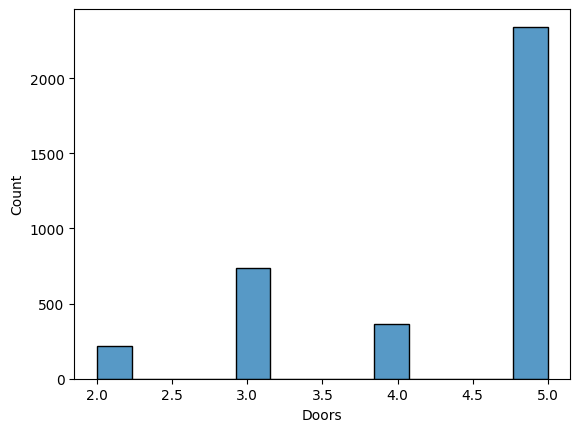

In [38]:
sns.histplot(df["Doors"])

<Axes: xlabel='Doors', ylabel='Price'>

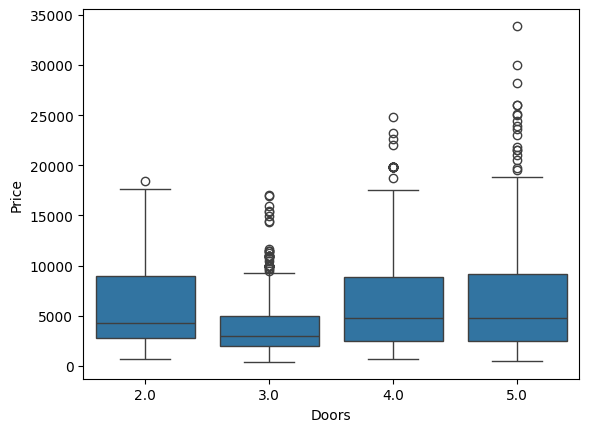

In [40]:
sns.boxplot(x=df["Doors"],y=df['Price'])

<Axes: xlabel='Seats', ylabel='Count'>

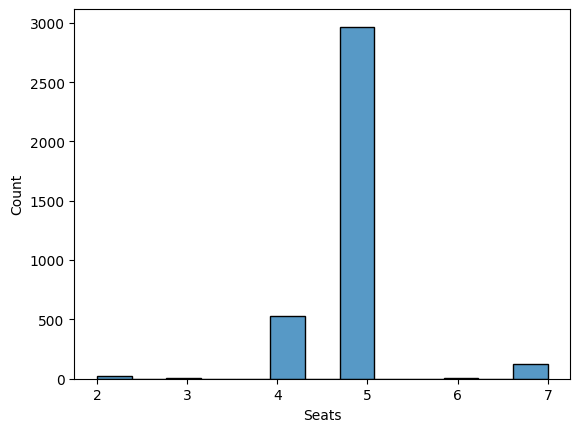

In [41]:
sns.histplot(df["Seats"])

<Axes: xlabel='Seats', ylabel='Price'>

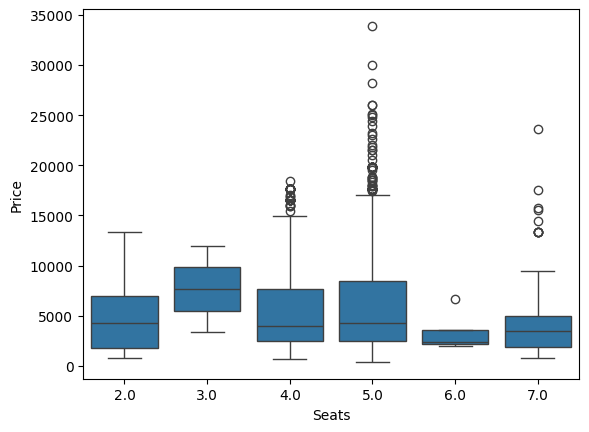

In [42]:
sns.boxplot(x=df["Seats"],y=df["Price"])

In [43]:
pd.crosstab(df["Doors"],df["Seats"],margins=True,normalize=True)

Seats,2.0,3.0,4.0,5.0,6.0,7.0,All
Doors,,,,,,,
2.0,0.006320,0.000275,0.048640,0.002473,0.000000,0.000000,0.057708
3.0,0.000000,0.000275,0.070624,0.130530,0.000000,0.000000,0.201429
4.0,0.000000,0.000000,0.001374,0.097554,0.000000,0.000000,0.098928
5.0,0.000275,0.000000,0.025007,0.582578,0.001099,0.032976,0.641935
All,0.006595,0.000550,0.145644,0.813135,0.001099,0.032976,1.000000


In [44]:
df["Emission Class"].value_counts()

,count
Emission Class,
Euro 5,1256
Euro 6,1108
Euro 4,1067
Euro 3,137
Euro 2,25
Euro 1,4


<Axes: xlabel='Emission Class', ylabel='Price'>

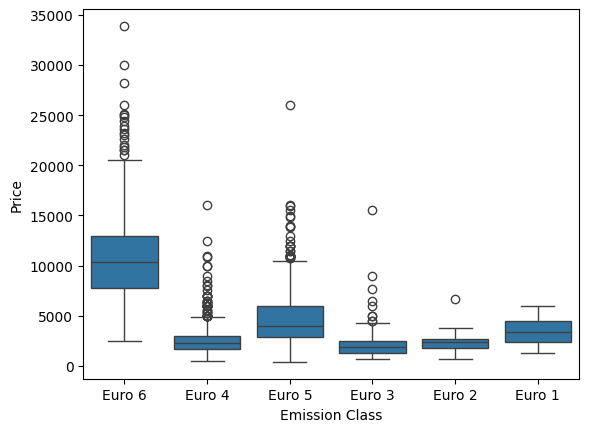

In [45]:
sns.boxplot(x=df["Emission Class"],y=df["Price"])

<Axes: xlabel='Emission Class', ylabel='Registration_Year'>

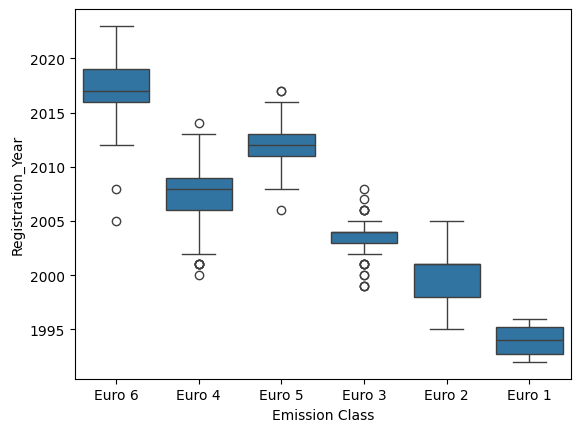

In [46]:
sns.boxplot(x=df["Emission Class"],y=df["Registration_Year"])

In [47]:
df["Service history"].fillna("None",inplace=True)

<Axes: xlabel='Service history', ylabel='Price'>

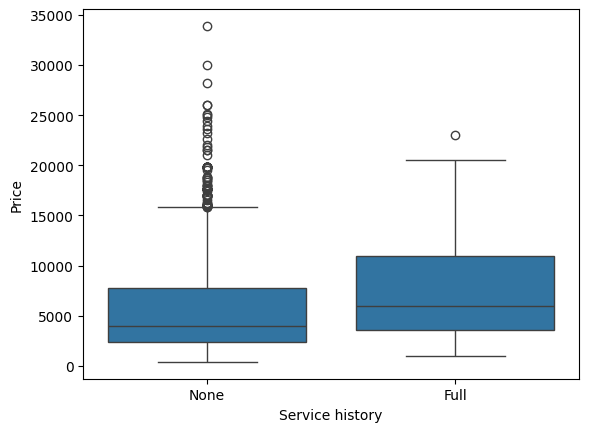

In [48]:
sns.boxplot(x=df["Service history"],y=df["Price"])

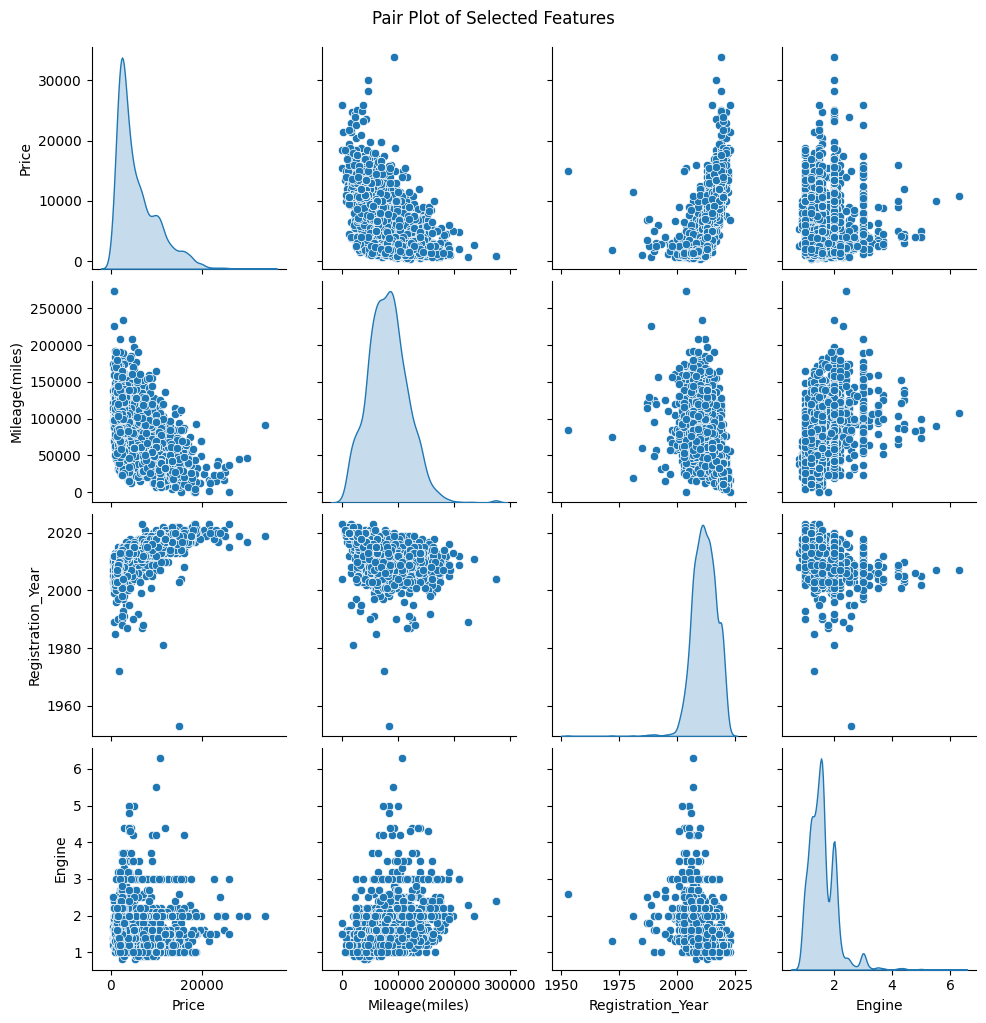

In [49]:
# Selecting numerical columns for the pair plot
selected_features = df[['Price', 'Mileage(miles)', 'Registration_Year', 'Engine']]
sns.pairplot(selected_features, diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [51]:
# remove rows with missing prices as this is the target variable
df.dropna(subset=['Price'], inplace=True)

# drop unnamed column
#df.drop("Unnamed: 0", axis=1, inplace=True)

# drop title column because irrelevant
df.drop("title", axis=1, inplace=True)

# drop service history column because only "full" or Nan
df.drop("Service history", axis=1, inplace=True)

In [53]:
df['Fuel type'].fillna(df['Fuel type'].mode()[0], inplace=True)
df['Body type'].fillna(df['Body type'].mode()[0], inplace=True)
df['Emission Class'].fillna(df['Emission Class'].mode()[0], inplace=True)
df['Gearbox'].fillna(df['Gearbox'].mode()[0], inplace=True)

In [54]:
df['Mileage(miles)'].fillna(df['Mileage(miles)'].median(), inplace=True)
df['Registration_Year'].fillna(df['Registration_Year'].median(), inplace=True)
df['Previous Owners'].fillna(df['Previous Owners'].median(), inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Doors'].fillna(df['Doors'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True)

In [55]:
df.isnull().sum()

,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,0
Fuel type,0
Body type,0
Engine,0
Gearbox,0
Doors,0
Seats,0


In [56]:
df = pd.get_dummies(df, columns=['Gearbox', 'Emission Class', 'Fuel type', 'Body type'])

In [57]:
X = df.drop(labels=['Price'],axis=1).values
y = df[['Price']].values

In [58]:
from sklearn.model_selection import train_test_split

# split the data frame into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
from sklearn.linear_model import LinearRegression

# create and a linear model based on multiple independent variables
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import r2_score

# calculate R2-score
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.7845039418533855


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "KNeighbors Regression": KNeighborsRegressor(),
    "GradientBoosting Regression": GradientBoostingRegressor()
}

# Fit each model and calculate the R2 score
for name, model in models.items():
    model.fit(X_train, y_train)                # Train the model
    y_test_pred = model.predict(X_test)        # Predict on test set
    r2 = r2_score(y_test, y_test_pred)         # Calculate R2 score
    print(f"{name} R-squared (R2): {r2:.4f}")


Linear Regression R-squared (R2): 0.7845
Decision Tree Regression R-squared (R2): 0.8168
Random Forest Regression R-squared (R2): 0.8797
KNeighbors Regression R-squared (R2): 0.5836
GradientBoosting Regression R-squared (R2): 0.8752


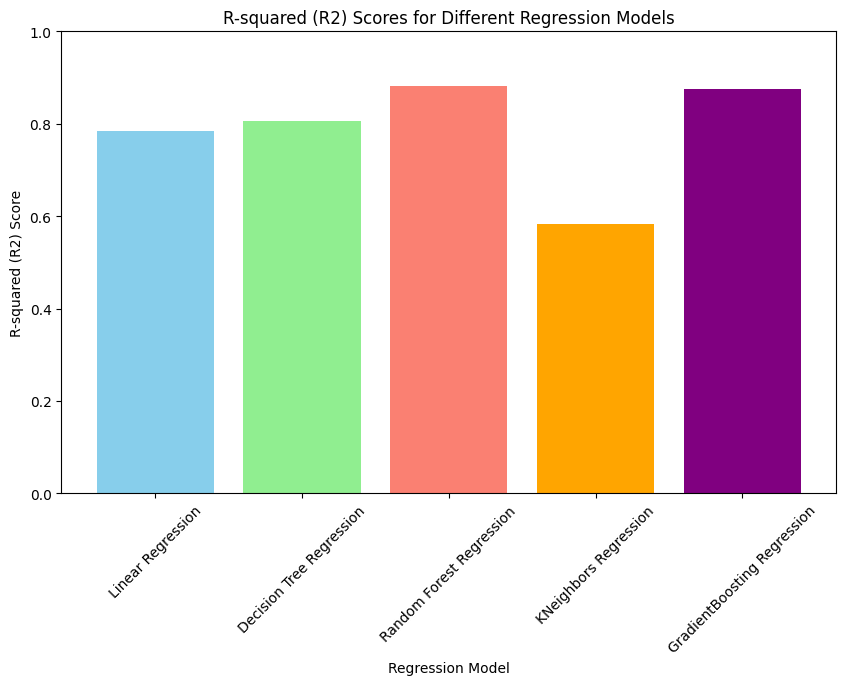

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "KNeighbors Regression": KNeighborsRegressor(),
    "GradientBoosting Regression": GradientBoostingRegressor()
}

# Dictionary to store R2 scores
r2_scores = {}

# Fit each model and calculate the R2 score
for name, model in models.items():
    model.fit(X_train, y_train)                # Train the model
    y_test_pred = model.predict(X_test)        # Predict on test set
    r2 = r2_score(y_test, y_test_pred)         # Calculate R2 score
    r2_scores[name] = r2                       # Store the score

# Plotting the R2 scores
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title("R-squared (R2) Scores for Different Regression Models")
plt.xlabel("Regression Model")
plt.ylabel("R-squared (R2) Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust based on the range of R2 scores you expect
plt.show()
